## Check the data

In [1]:
from image_transforms import *
from paths import train_dir
from plots import *
from data_setup import DataManager
from model_builder import TinyVGG

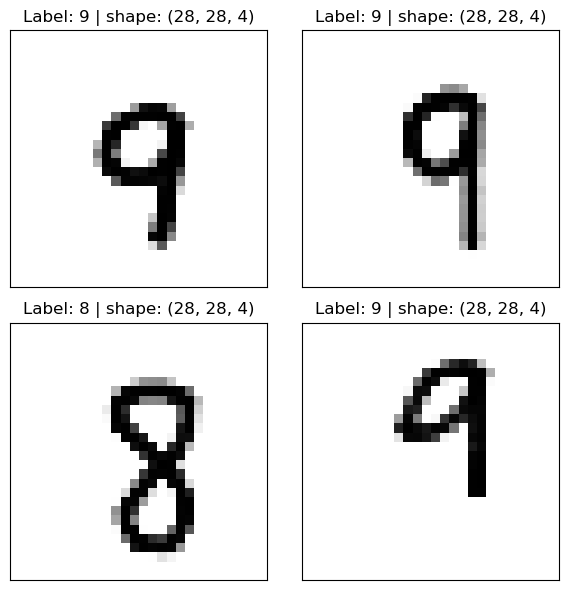

In [8]:
plot_random_images(path=train_dir, n=4, img_format='png', fig_width=6, show_shape=True)

In [4]:
data = DataManager()

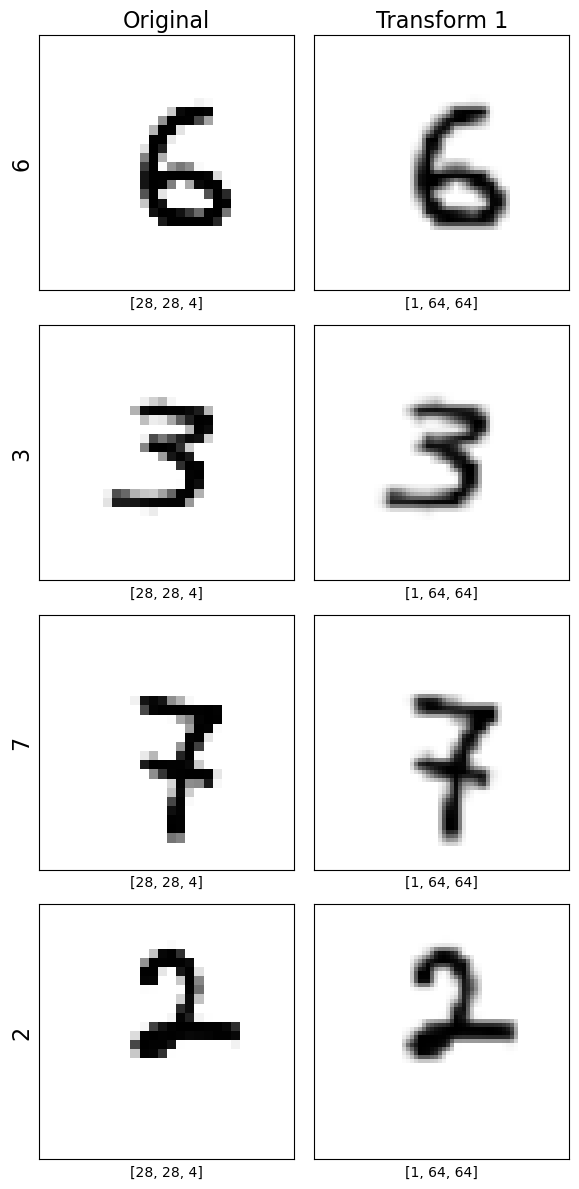

In [10]:
plot_transform(dataset=data.train_dataset, transform=simple_transform, n=4, fig_width=6)

## Training

In [11]:
!python -m training.train --epochs 2 --batch_size 32 --learning_rate 0.001 -t simple_transform --hidden_units 10 --num_workers 1

c:\Users\Marcin\Documents\Python\ml-projects\Handwritten-digit-recognizer\training\.conda\python.exe: Error while finding module specification for 'training.train' (ModuleNotFoundError: No module named 'training')


In [8]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_0/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



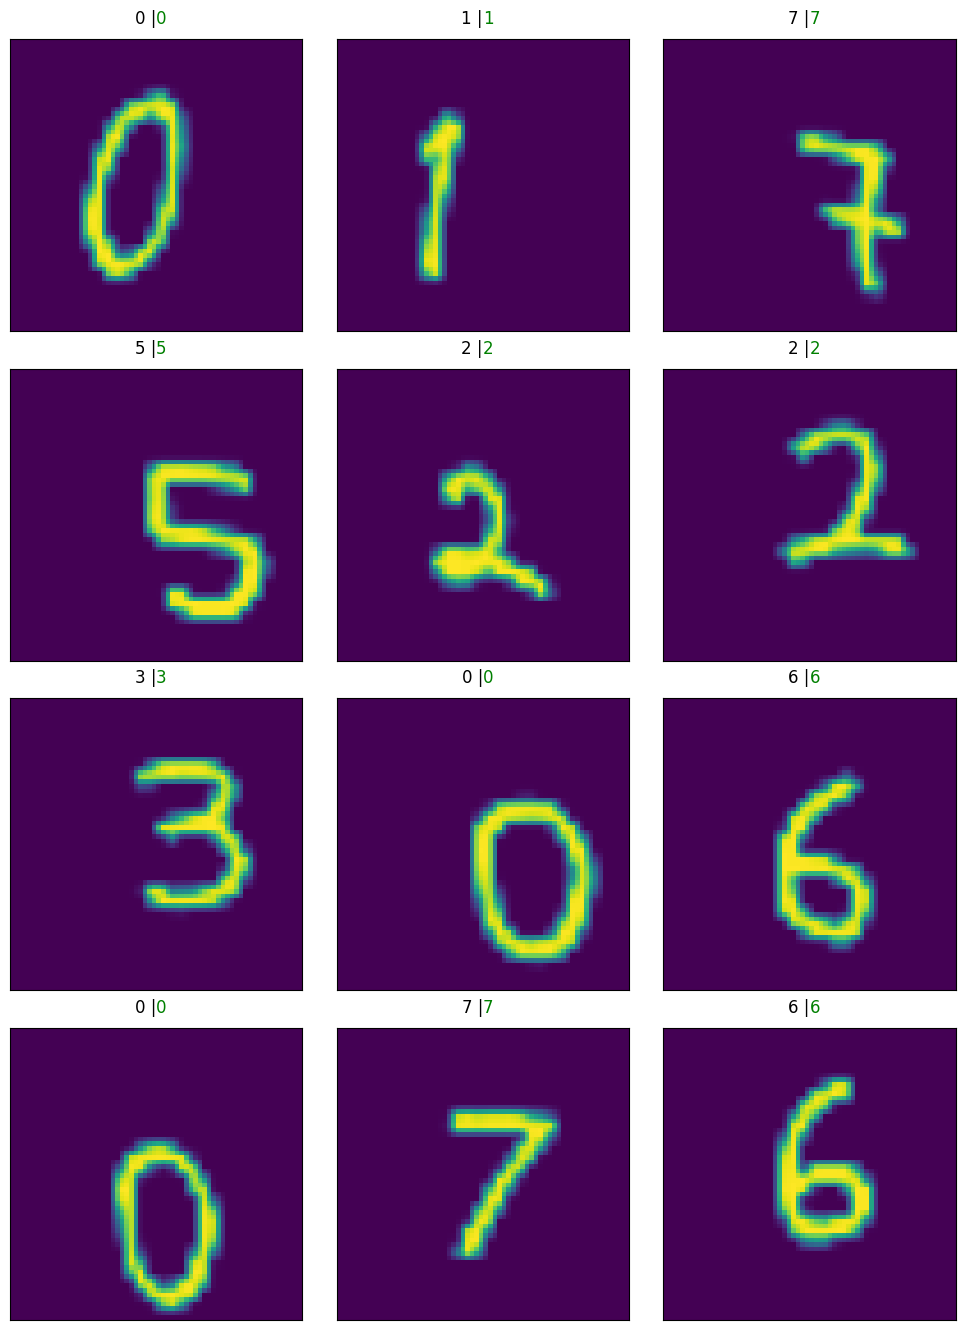

In [ ]:
plot_predict_images(model=model, dataset=data.test_dataset)

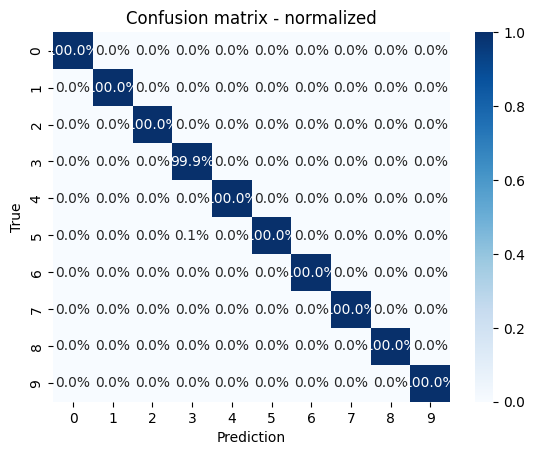

In [ ]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

# MODEL IMPROVEMENTS
**NOTE** our model has nice results in training and testing but it's sucks in production

## 1. Change Images size to 28x28

In [13]:
data = DataManager(transform=transform_28x28)

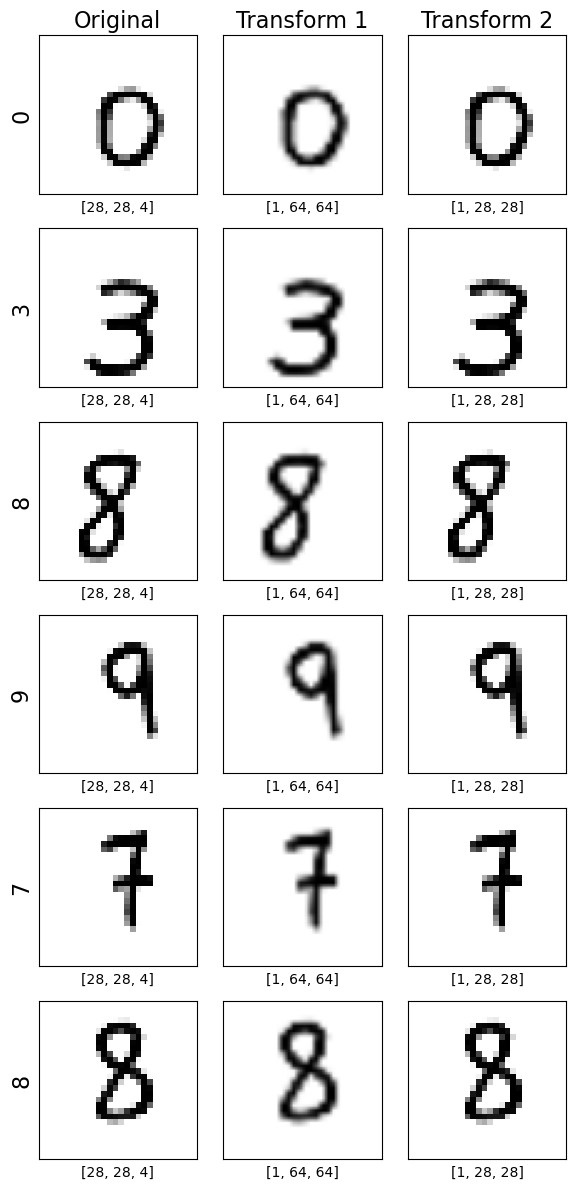

In [14]:
plot_transform(dataset=data.train_dataset, transform=[simple_transform, transform_28x28], n=6, fig_width=6)

## Training

In [2]:
!python -m train --epochs 2 --batch_size 32 --learning_rate 0.001 -t transform_28x28 --hidden_units 10 --num_workers 1

Directory "models\model_2" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 0.158 | Accuracy: 0.95
Test  ->  Loss: 0.007 | Accuracy: 1.0

Saved model to "models\model_2\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.004 | Accuracy: 1.0
Test  ->  Loss: 0.0 | Accuracy: 1.0

Saved model to "models\model_2\best.pt"
Saved model to "models\model_2\last.pt"
Saved model results to: "models\model_2\results.csv"
Training completed in 414 seconds


In [15]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_1/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



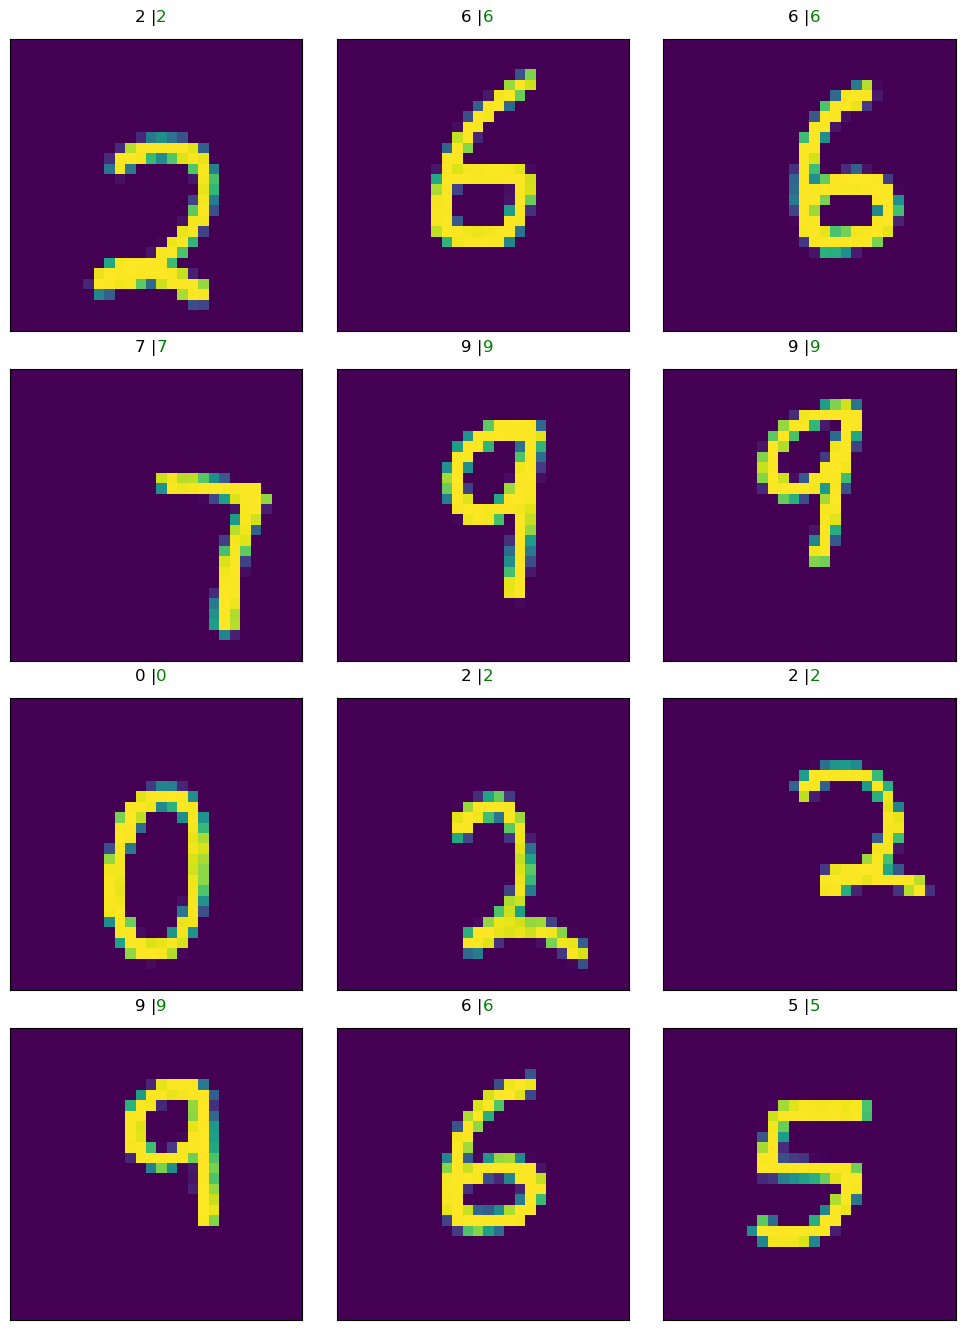

In [16]:
plot_predict_images(model=model, dataset=data.test_dataset)

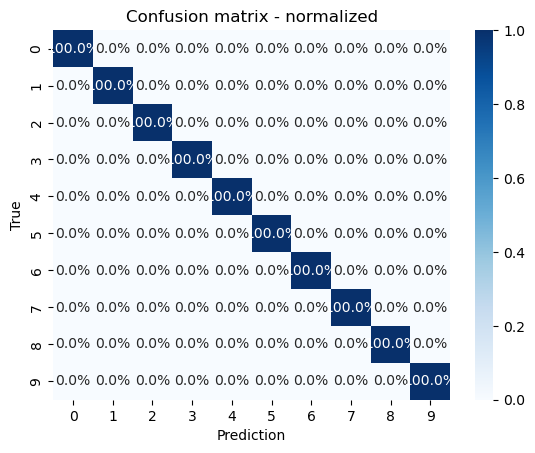

In [17]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

## 2. Use Binary Image transformation

In [6]:
data = DataManager(transform=binary_transform_28x28)

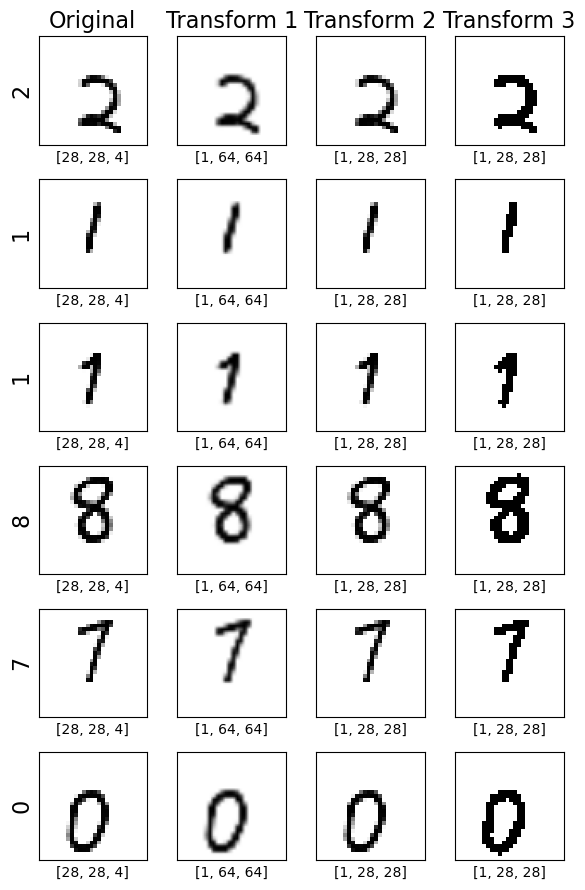

In [3]:
plot_transform(dataset=data.train_dataset, transform=[simple_transform, transform_28x28, binary_transform_28x28], n=6, fig_width=6)

## Training

In [4]:
!python -m train --epochs 2 --batch_size 32 --learning_rate 0.001 -t binary_transform_28x28 --hidden_units 10

Directory "models\model_9" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 0.139 | Accuracy: 0.95
Test  ->  Loss: 0.013 | Accuracy: 1.0

Saved model to "models\model_9\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.01 | Accuracy: 1.0
Test  ->  Loss: 0.005 | Accuracy: 1.0

Saved model to "models\model_9\best.pt"
Saved model to "models\model_9\last.pt"
Saved model results to: "models\model_9\results.csv"
Training completed in 941 seconds


In [8]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_2/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



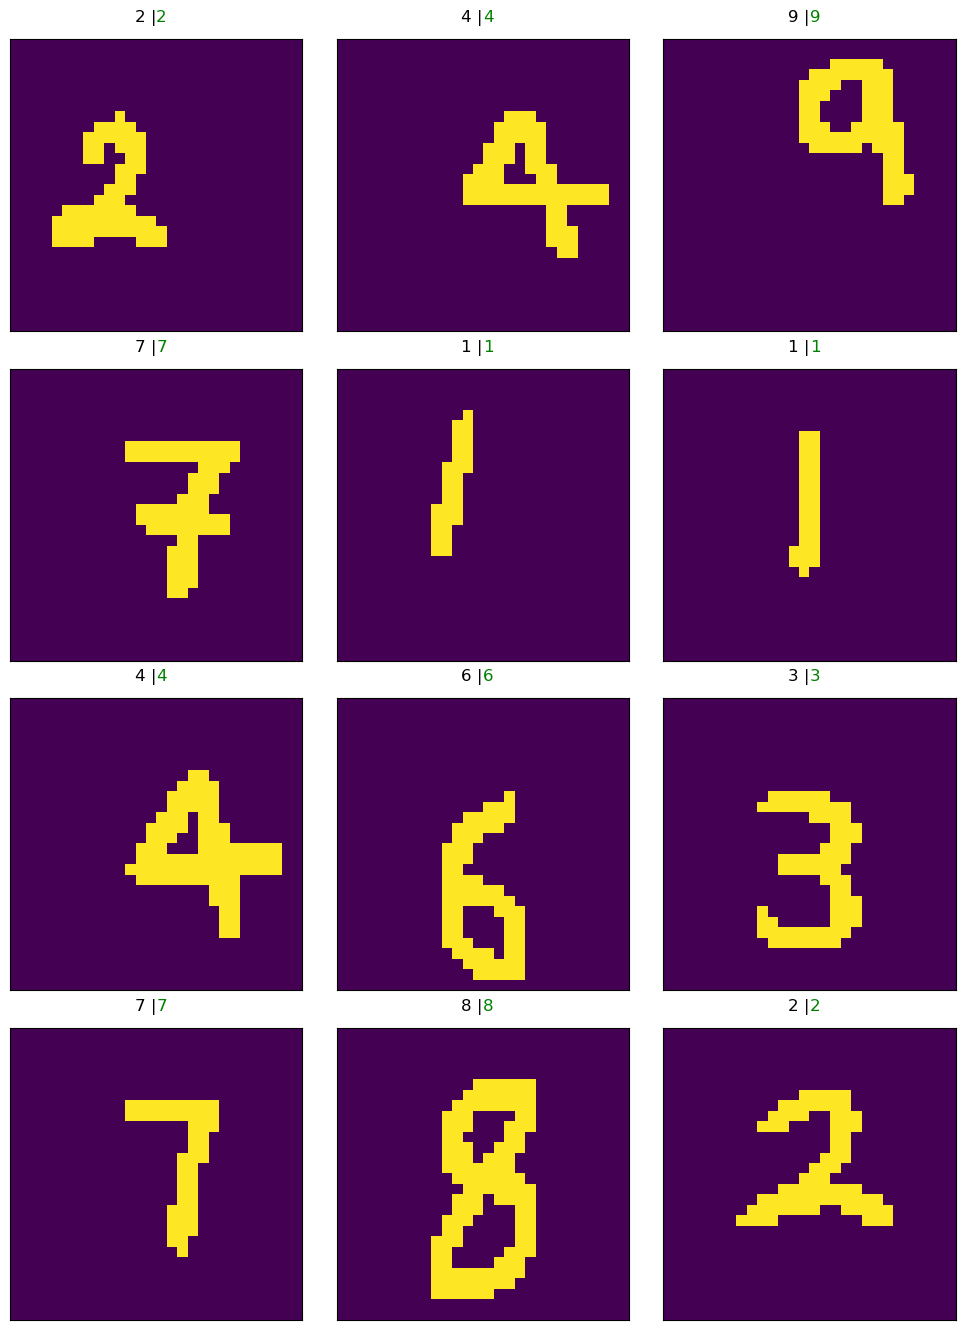

In [9]:
plot_predict_images(model=model, dataset=data.test_dataset)

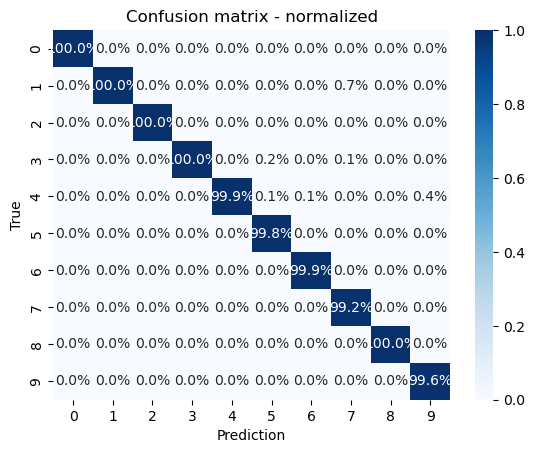

In [10]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

## 3. Use Binary Image transformation with affine

In [2]:
data = DataManager(transform=binary_transform_affine)

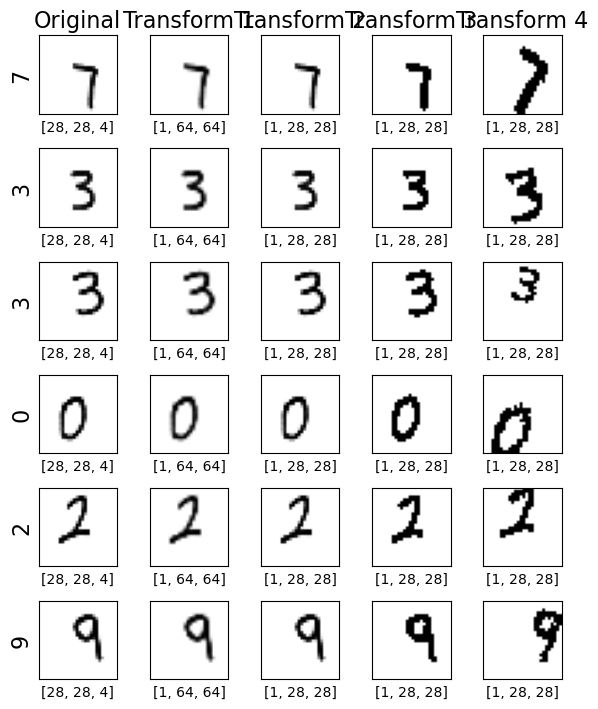

In [3]:
plot_transform(dataset=data.train_dataset, transform=[simple_transform, transform_28x28, binary_transform_28x28, binary_transform_affine], 
               n=6, fig_width=6)

## Training

In [4]:
!python -m train --epochs 2 --batch_size 32 --learning_rate 0.001 -t binary_transform_affine --hidden_units 10

Directory "models\model_3" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.124 | Accuracy: 0.61
Test  ->  Loss: 0.615 | Accuracy: 0.79

Saved model to "models\model_3\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.525 | Accuracy: 0.82
Test  ->  Loss: 0.438 | Accuracy: 0.85

Saved model to "models\model_3\best.pt"
Saved model to "models\model_3\last.pt"
Saved model results to: "models\model_3\results.csv"
Training completed in 273 seconds


In [5]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_3/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



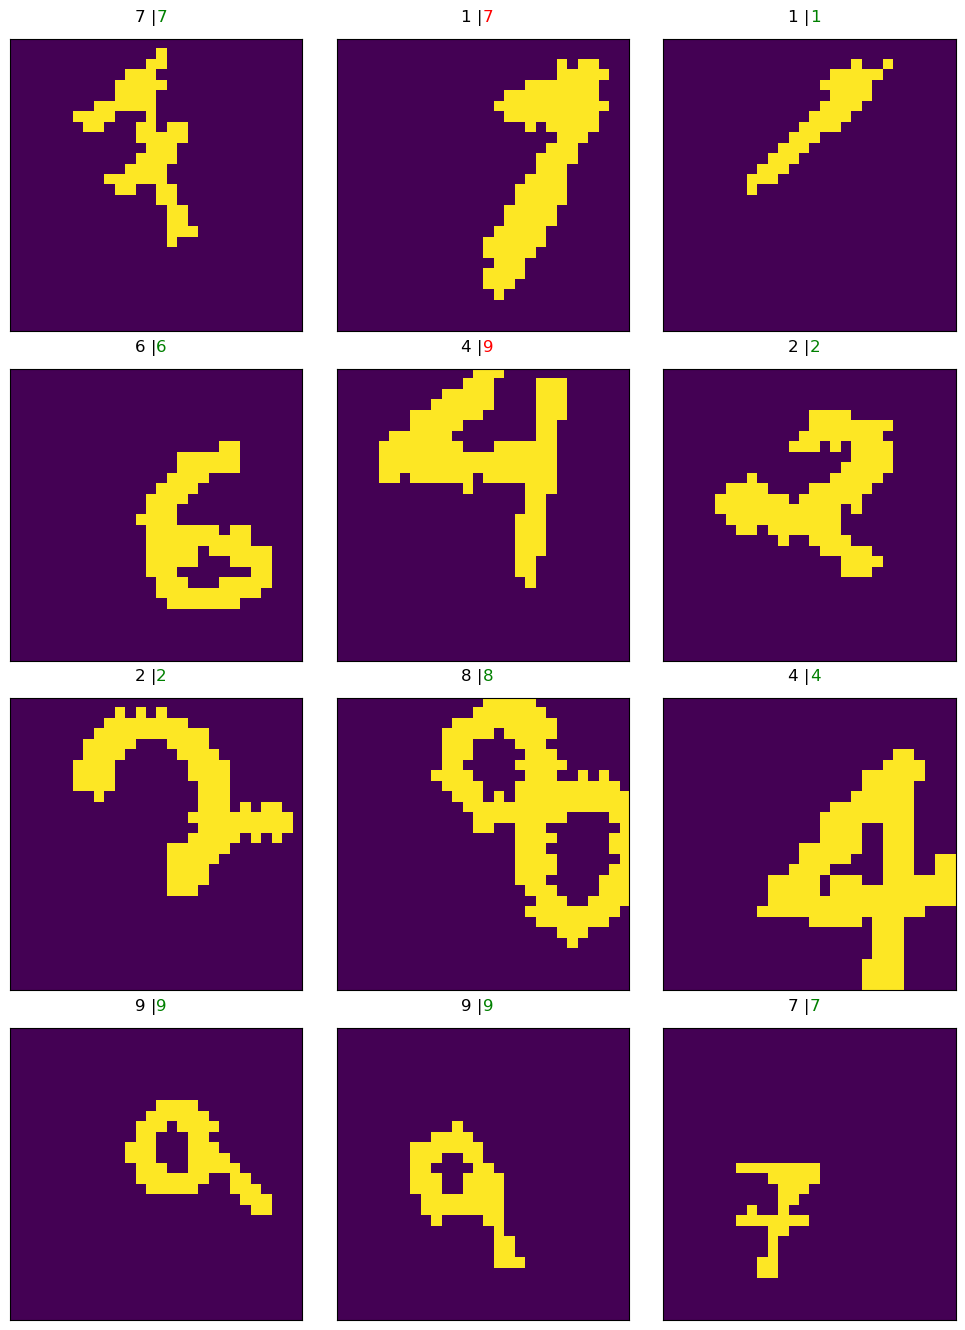

In [6]:
plot_predict_images(model=model, dataset=data.test_dataset)

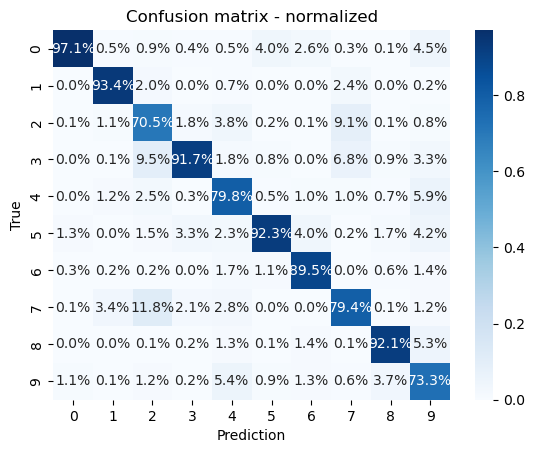

In [7]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

## 4. Use Binary Image transformation with affine 64x64

In [2]:
data = DataManager(transform=binary_transform_affine_64x64)

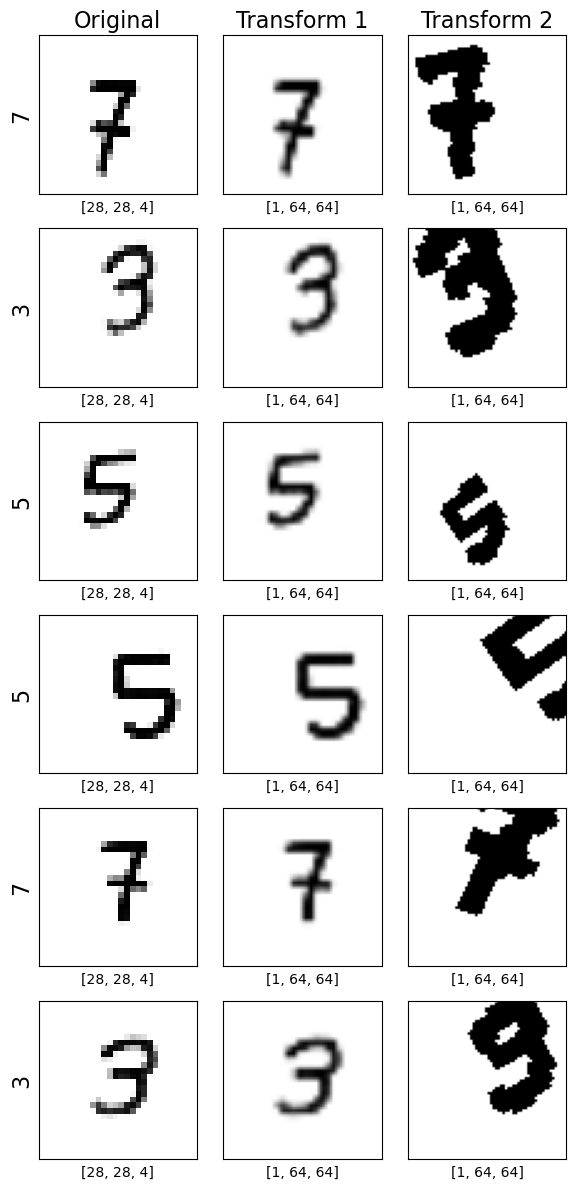

In [3]:
plot_transform(dataset=data.train_dataset, transform=[simple_transform, binary_transform_affine_64x64], 
               n=6, fig_width=6)

In [ ]:
!python -m train --epochs 2 --batch_size 32 --learning_rate 0.001 -t binary_transform_affine_64x64 --hidden_units 10

Directory "models\model_4" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.05 | Accuracy: 0.65
Test  ->  Loss: 0.57 | Accuracy: 0.82

Saved model to "models\model_4\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.446 | Accuracy: 0.86
Test  ->  Loss: 0.338 | Accuracy: 0.9

Saved model to "models\model_4\best.pt"
Saved model to "models\model_4\last.pt"
Saved model results to: "models\model_4\results.csv"
Training completed in 697 seconds


In [3]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_4/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



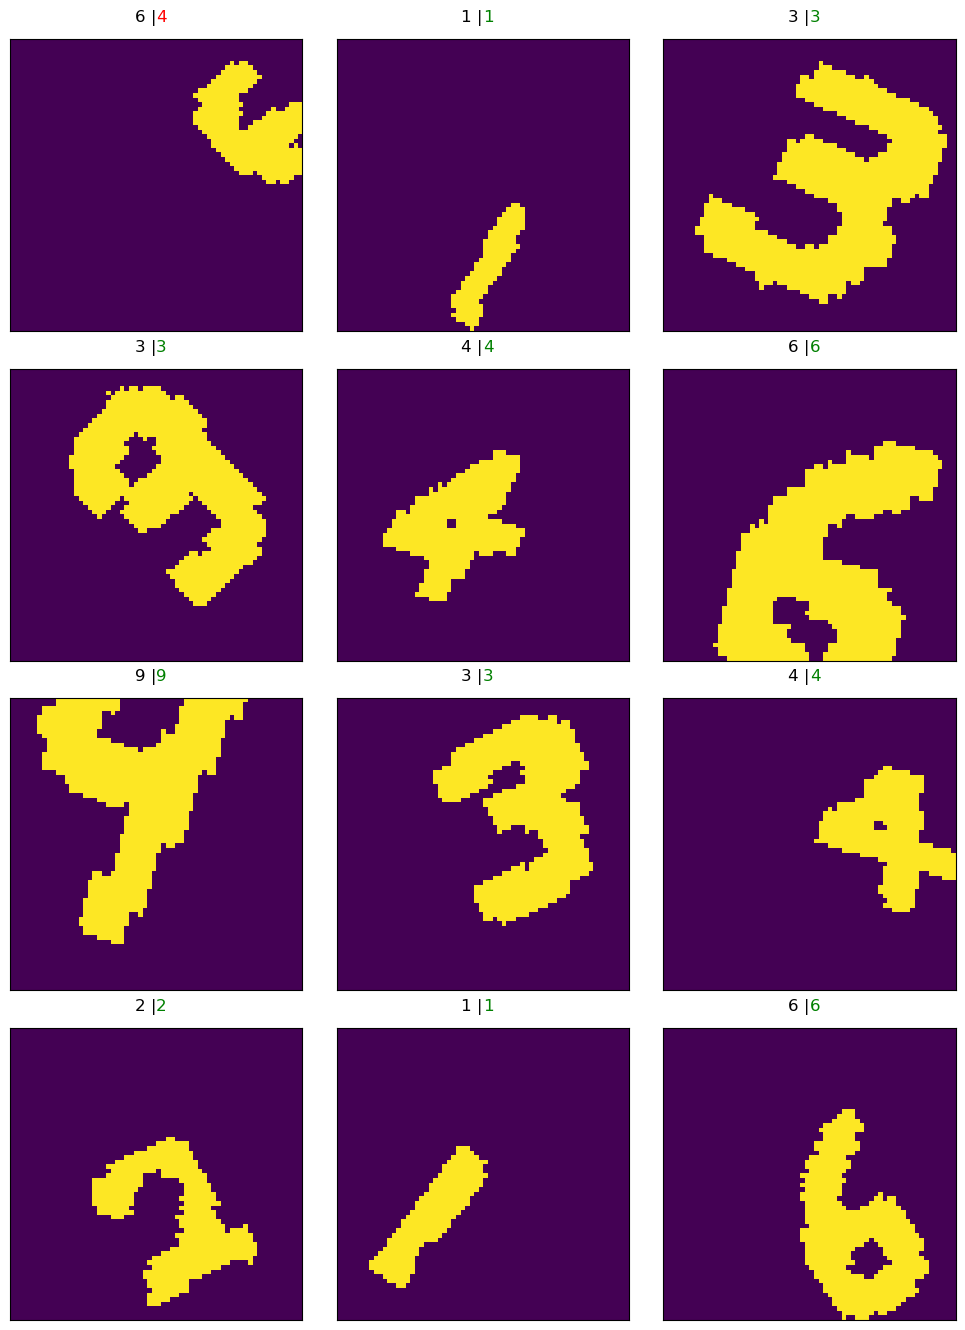

In [4]:
plot_predict_images(model=model, dataset=data.test_dataset)

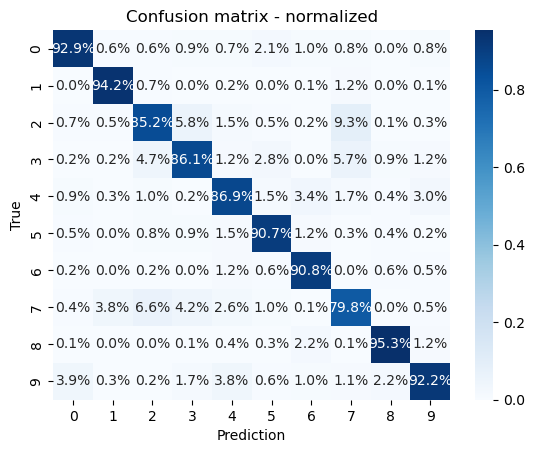

In [5]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

## 5. Use Binary Image transformation with affine v2

In [6]:
data = DataManager(transform=binary_transform_affine)

## Training

In [11]:
!python -m train --epochs 2 --batch_size 32 --learning_rate 0.001 -t binary_transform_affine -tt binary_transform_28x28 --hidden_units 10

Directory "models\model_6" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 1.058 | Accuracy: 0.63
Test  ->  Loss: 0.11 | Accuracy: 0.98

Saved model to "models\model_6\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.528 | Accuracy: 0.82
Test  ->  Loss: 0.065 | Accuracy: 0.99

Saved model to "models\model_6\best.pt"
Saved model to "models\model_6\last.pt"
Saved model results to: "models\model_6\results.csv"
Training completed in 324 seconds


In [7]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_5/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



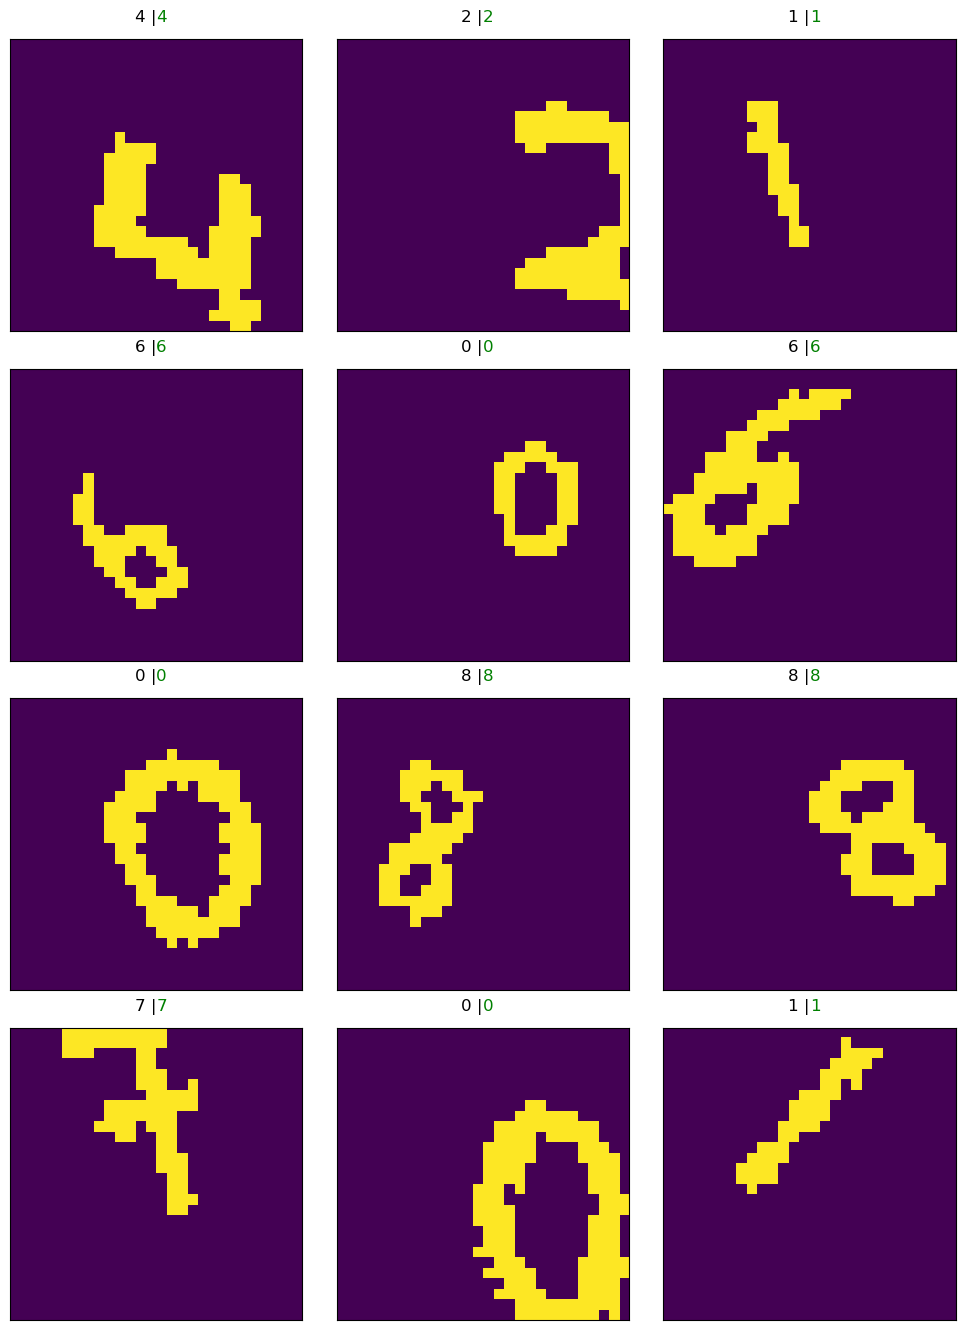

In [9]:
plot_predict_images(model=model, dataset=data.test_dataset)

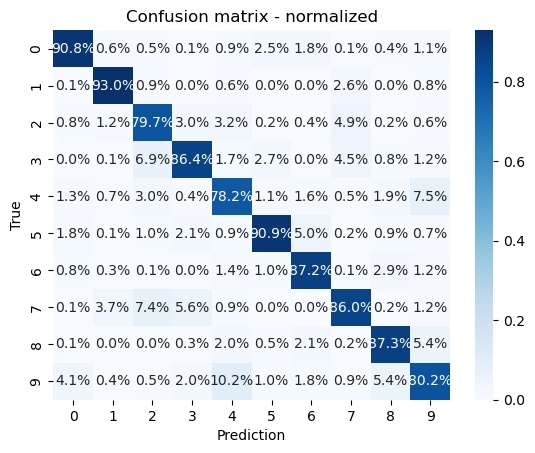

In [8]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

# Production Data

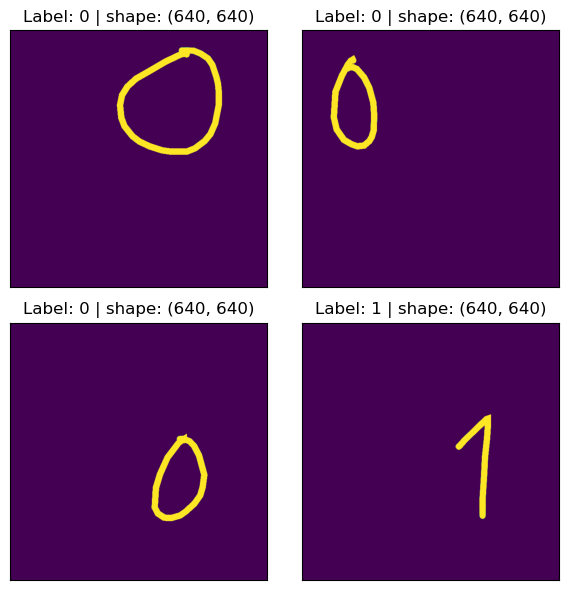

In [2]:
plot_random_images(path=train_dir, n=4, img_format='png', fig_width=6, show_shape=True)

In [6]:
data = DataManager()

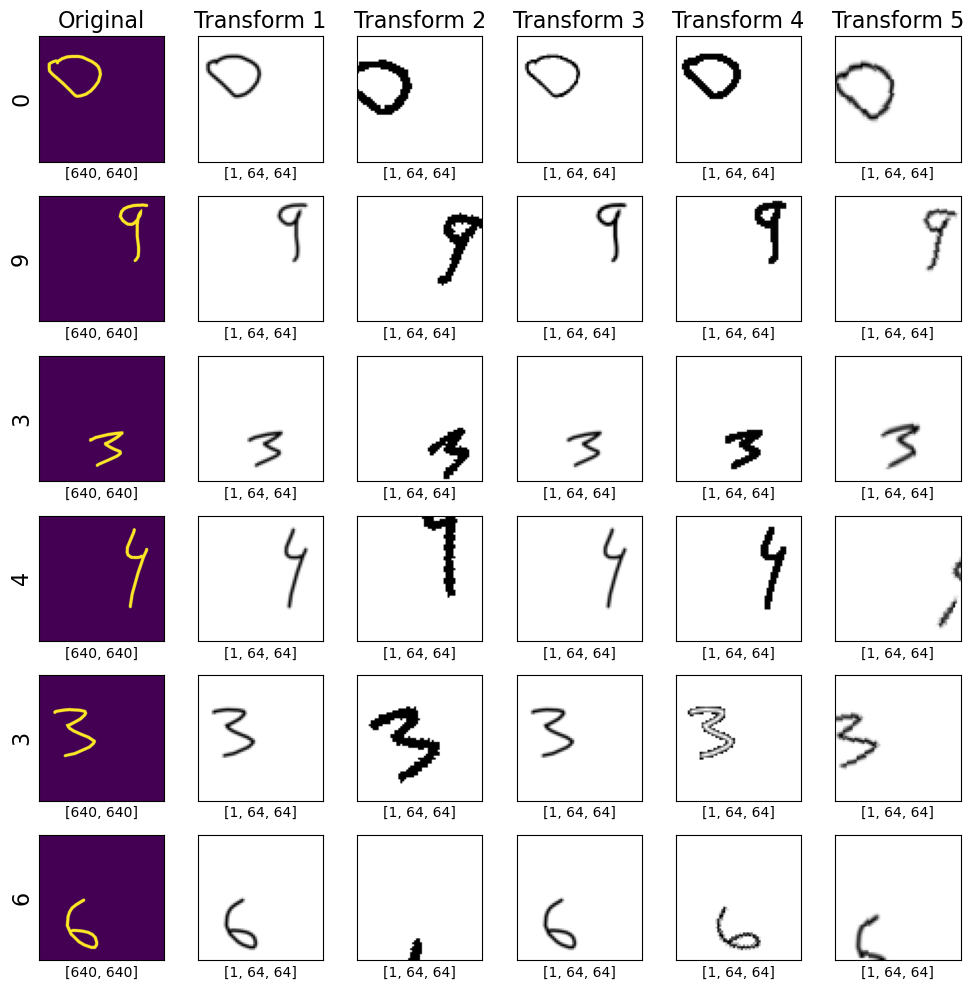

In [7]:
plot_transform(dataset=data.train_dataset, transform=[simple_transform, binary_transform_affine_64x64, trivial_transform, auto_augment_transform, mix_transform], n=6, fig_width=10)

## Check model accuracy on production data

In [ ]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_4/best.pt', weights_only=True))

<All keys matched successfully>

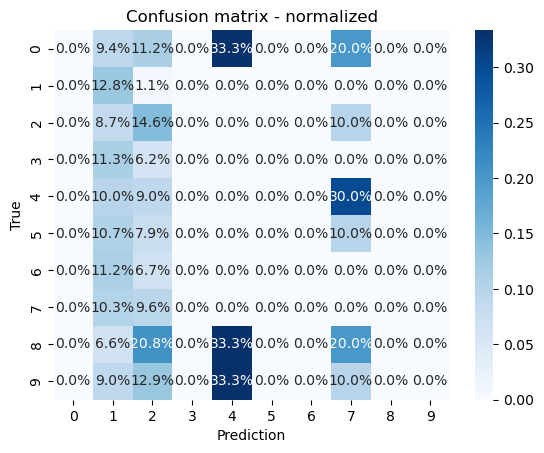

In [ ]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

**The model performace on production data is poor, so i decided to improve model on the production data.**

## Training model on Production data

In [ ]:
!python -m train --epochs 100 --batch_size 32 --learning_rate 0.001 -t mix_transform -tt simple_transform --hidden_units 10

Directory "models\model_11" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 2.311 | Accuracy: 0.09
Test  ->  Loss: 2.301 | Accuracy: 0.17

Saved model to "models\model_11\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 2.303 | Accuracy: 0.1
Test  ->  Loss: 2.3 | Accuracy: 0.18

Saved model to "models\model_11\best.pt"
--------------------------------------------------
Epoch: 2
Train ->  Loss: 2.295 | Accuracy: 0.14
Test  ->  Loss: 2.283 | Accuracy: 0.13

Saved model to "models\model_11\best.pt"
--------------------------------------------------
Epoch: 3
Train ->  Loss: 2.265 | Accuracy: 0.14
Test  ->  Loss: 2.269 | Accuracy: 0.13

Saved model to "models\model_11\best.pt"
--------------------------------------------------
Epoch: 4
Train ->  Loss: 2.236 | Accuracy: 0.16
Test  ->  Loss: 2.259 | Accuracy: 0.12

Saved model to "models\model_11\best.pt"
--------------------------------------------------
Epoch: 

In [ ]:
model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('models/model_11/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



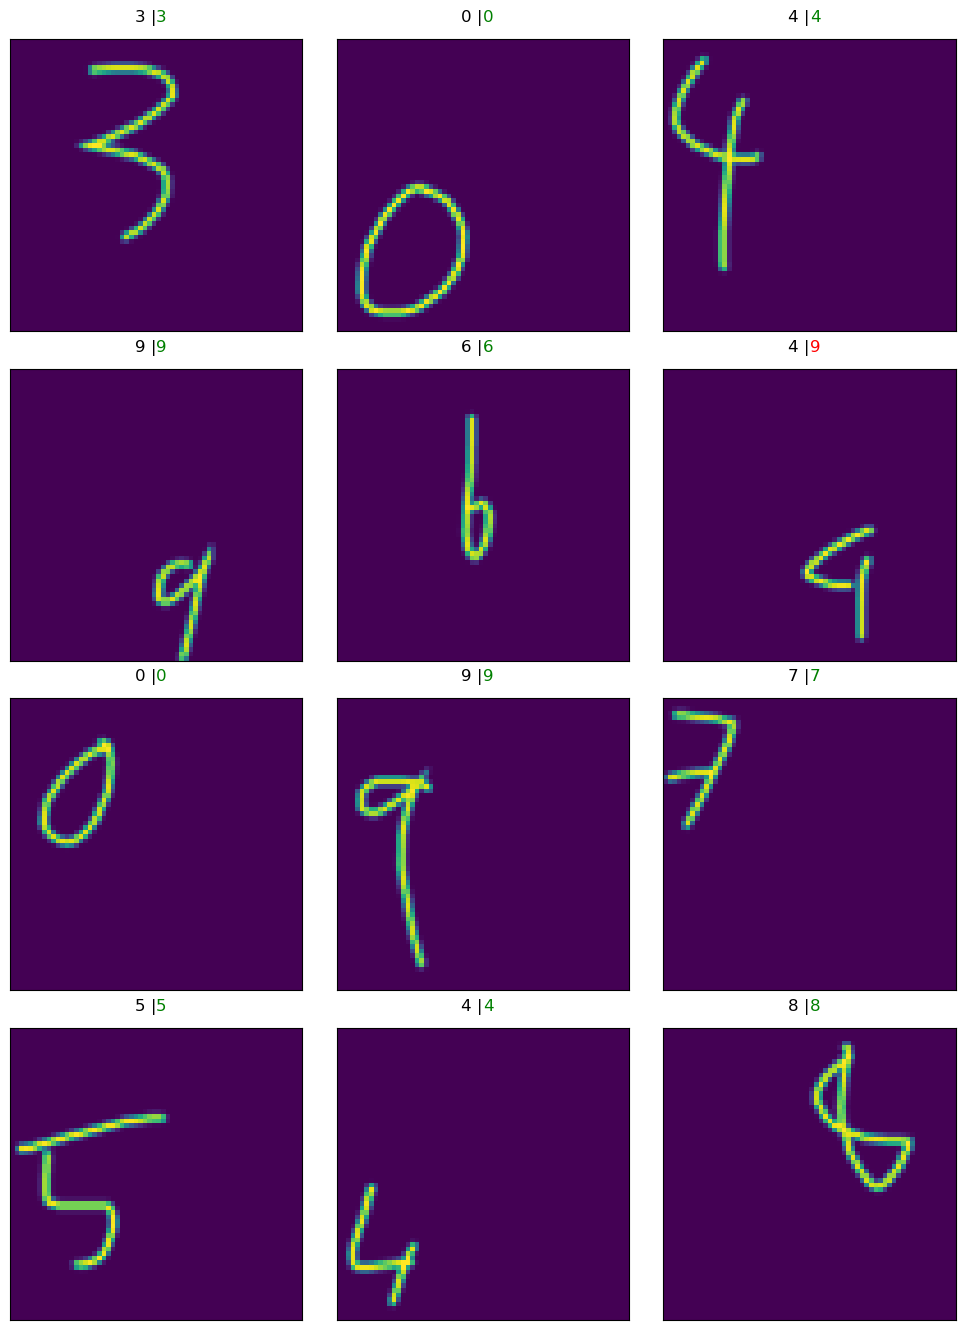

In [ ]:
plot_predict_images(model=model, dataset=data.test_dataset)

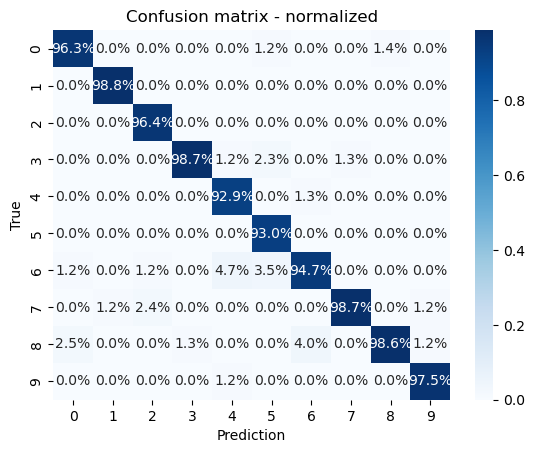

In [ ]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

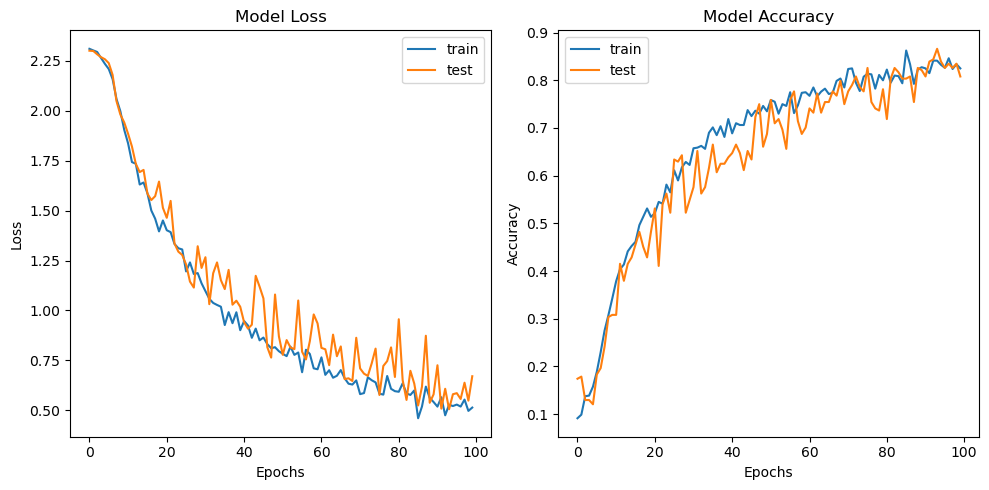

In [ ]:
plot_model_results('models/model_11/results.csv')

### Project Summary
Initial model performance on Kaggle datasets was promising, but the model performed poorly in the production environment. To address this, a new dataset was collected directly from the production environment.

Following retraining with production data and the application of data augmentation, the model achieved a **satisfactory accuracy of 84%.** This confirms the effectiveness of adapting the model to real-world operating conditions.